<a href="https://colab.research.google.com/github/xslittlemaggie/Machine-Learning-Projects/blob/master/Wine_DecisionTree_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Wine with Decision Tree & Random Forest  </center></h1>

The purpose of this project is to practice the ML techniques of **Decision Tree** & **Random Forest** & **Boosting** with the sklearn built-in dataset **wine**, and compare the similarities and differences between  **Decision Tree** & **Random Forest** & **Boosting**.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 24px">
    <ol>
        <li><a href="#Part One">Part One: Decision Tree</a></li>
      <li><a href="#Part Two">Part Two: Random Forest</a></li>
      <li><a href="#Part Three">Part Three: Boosting</a></li>
      <li><a href="#Part Four">Part Four: Comparson of three different models</a></li>
    </ol>
</div>
<br>
<hr>

## Part 0: Import libraries & Upload the dataset wine

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

### 1. upload the wine dataset

In [0]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

In [3]:
wine_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis = 1)
wine_df.columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline', 'Class label']
wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 2. Split the data into training, testing datasets
Since the purpose of this project is to practice the different models, decision tree, random forest, and boosting. I will not spend much time on data cleaning, data preprocessing, and feature engineering. 

In addition, this dataset is loaded from the sklearn built-in dataset, and the dataset is clean. 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)  # choose 30% of the data as validation dataset

# Part One: Decision Tree & Bagging (= Bootstrap Aggregating)

# 1. Decision Tree

## 1.1 Create and train the Decision Tree model

In [5]:
# create the model
clf = DecisionTreeClassifier(random_state = 30)
clf.fit(x_train, y_train)

train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

print('Decision tree train/test accuracies: {:.3f}/{:.3f}'.format(train_score, test_score))

Decision tree train/test accuracies: 1.000/0.907


With all the parameters by default, the performance of the Decision Tree model is 90%.

## 1.2. Decision Tree Visualization

In [0]:
#!pip install graphviz

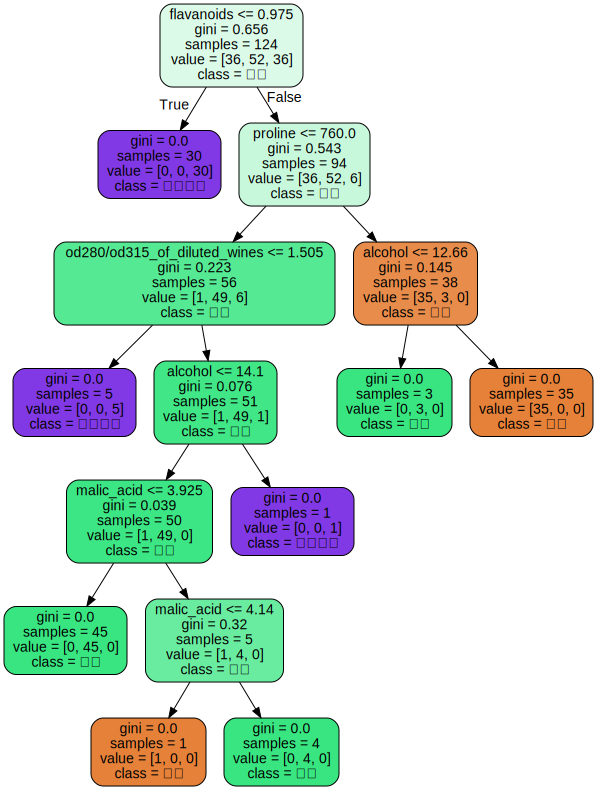

In [7]:
#feature_name = ["酒精", "苹果酸", "灰", "灰的碱性", "镁", "总酚", "类黄酮", "非黄烷类酚类", "花青素", "颜色强度", "色调", "od280/od315稀释葡萄酒", "脯氨酸"]
import graphviz

dot_data = export_graphviz(clf
                           ,feature_names = feature_names
                          ,class_names = ["琴酒", "雪莉", "贝尔摩德"] # target_names
                          ,filled = True
                          ,rounded = True
                          )
graph = graphviz.Source(dot_data)
graph

From the tree graph above, only three features are used to determine the tree. 

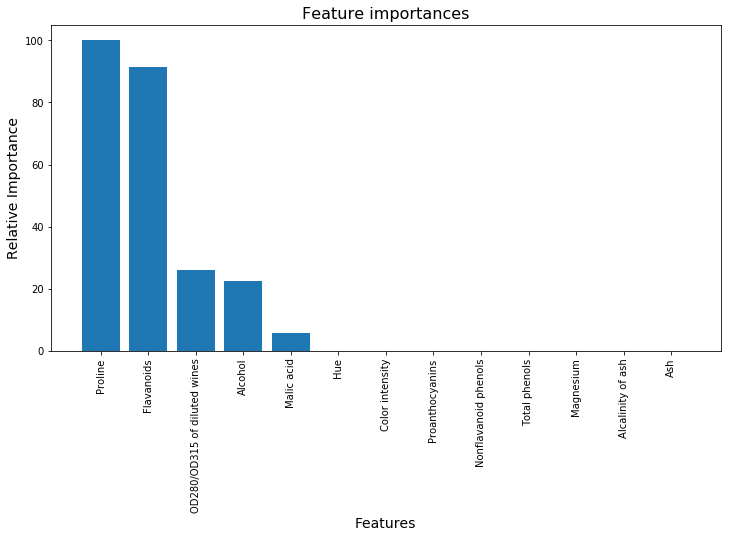

In [8]:
def plot_feature_importances(feature_importance, title, feature_names):
  feature_importance = 100 * (feature_importance / max(feature_importance))
  index_sorted = np.flipud(np.argsort(feature_importance))
  pos = np.arange(index_sorted.shape[0]) + 0.8
  plt.figure(figsize=(12,6))
  plt.bar(pos, feature_importance[index_sorted], align = 'center')
  plt.title('Feature importances', size = 16)
  plt.xticks(pos, np.array(feature_names)[index_sorted])
  plt.xticks(rotation=90)
  plt.ylabel('Relative Importance', size = 14)
  plt.xlabel('Features', size = 14)
  plt.show()

feature_importance = clf.feature_importances_  
plot_feature_importances(feature_importance, 'Feature importances', wine_df.columns)

## 1.3. Decision Tree model fine tune (parameters adjusting)

### Main parameters:
>Parameters | Explanation
>--- | --- 
>**Criterion** | entropy (more sensitive to impurity), gini(default)
>**random_state** | to make the random all the same each time 
>**splitter _ 1:** | best (default) - the model will select the best features based on features importance
>**splitter _ 2:**| random - the model will random select sqrt of features
>**max_depth** | to avoid overfitting
>**min_samples_leaf** & **min_samples_split** | numerical missing value as one class
>**max_features** | categorical 
>**min_impurity_split** | if the info gain < the value, the split will not happen 


### 1.3.1 Change criterion from default "gini" to "entropy"

In [9]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.9444444444444444

The decision tree performance increases when criterion is changed to "entropy". 

Thus, the **first** parameter is: **criterion = "entropy"**

### 1.3.2. Change splitter from default "best" to "random"

In [10]:
clf = DecisionTreeClassifier(criterion = "entropy",
                             splitter = "random"
                             ,random_state = 30)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.9629629629629629

The decision tree performance increases when splitter is changed to "random". 

Thus, the **second** parameter is: **splitter = "random"**

### 1.3.3. Parameter: max_depth

Best performance: 0.9814814814814815
max_depth = 3


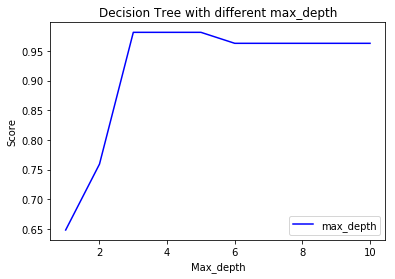

In [11]:
scores = []
for i in range(1, 11):
  clf = DecisionTreeClassifier(criterion = "entropy"
                            ,splitter = "random"
                            ,random_state = 30
                            ,max_depth = i
                              )
  clf.fit(x_train, y_train)
  score = clf.score(x_test, y_test)
  scores.append(score)

print("Best performance: {}".format(max(scores)))
print("max_depth = {}".format(scores.index(max(scores)) + 1))
plt.plot(range(1, 11), scores, color = "b", label = "max_depth")
plt.title("Decision Tree with different max_depth")
plt.xlabel('Max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()

The decision tree performance increases when splitter is changed to "random". 

Thus, the **third** parameter is: **max_depth = "3"**

### 1.3.4. Parameter: min_samples_leaf

Best performance: 0.9814814814814815
Min_samples_leaf: 1


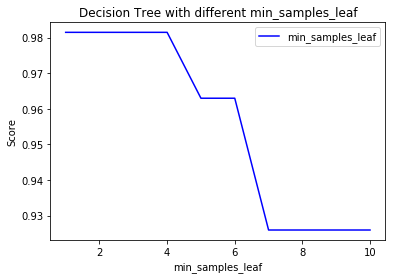

In [12]:
scores = []
for i in range(1, 11):
  clf = DecisionTreeClassifier(criterion = "entropy"
                            ,splitter = "random"
                            ,random_state = 30
                            ,max_depth = 3
                            ,min_samples_leaf = i
                              )
  clf.fit(x_train, y_train)
  score = clf.score(x_test, y_test)
  scores.append(score)
print("Best performance: {}".format(max(scores)))
print("Min_samples_leaf: {}".format(scores.index(max(scores)) + 1))
plt.plot(range(1, 11), scores, color = "b", label = "min_samples_leaf")
plt.title("Decision Tree with different min_samples_leaf")
plt.xlabel('min_samples_leaf')
plt.ylabel('Score')
plt.legend()
plt.show()

The performance of the model doesnn't change, thus, the default value of min_samples_leaf is the best after the previous parameters determined.

### 1.3.5. Parameter: min_samples_split

Best performance: 0.9814814814814815
Min_samples_split: 2


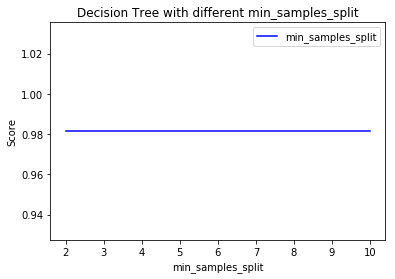

In [13]:
# the minimum value of min_samples_split = 2
scores = []
for i in range(2, 11):
  clf = DecisionTreeClassifier(criterion = "entropy"
                            ,splitter = "random"
                            ,random_state = 30
                            ,max_depth = 3
                            #,min_samples_leaf = i
                            ,min_samples_split = i
                              )
  clf.fit(x_train, y_train)
  score = clf.score(x_test, y_test)
  scores.append(score)
print("Best performance: {}".format(max(scores)))
print("Min_samples_split: {}".format(scores.index(max(scores)) + 2))
plt.plot(range(2, 11), scores, color = "b", label = "min_samples_split")
plt.title("Decision Tree with different min_samples_split")
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.legend()
plt.show()

The performance of the model doesnn't change, thus, the default value of min_samples_leaf is the best after the previous parameters determined.

**The best performance model: 98.14%**
- criterion = "entropy"
- splitter = "random"
- max_depth = 3


**The default prameters are the best:**
- min_samples_leaf = 1
- min_samples_split = 2

In [14]:
clf = DecisionTreeClassifier(criterion = "entropy"
                            ,splitter = "random"
                            ,random_state = 30
                            ,max_depth = 3
                            )
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.9814814814814815

## 1.4 Visualization of the tree and feature importance with the best performance

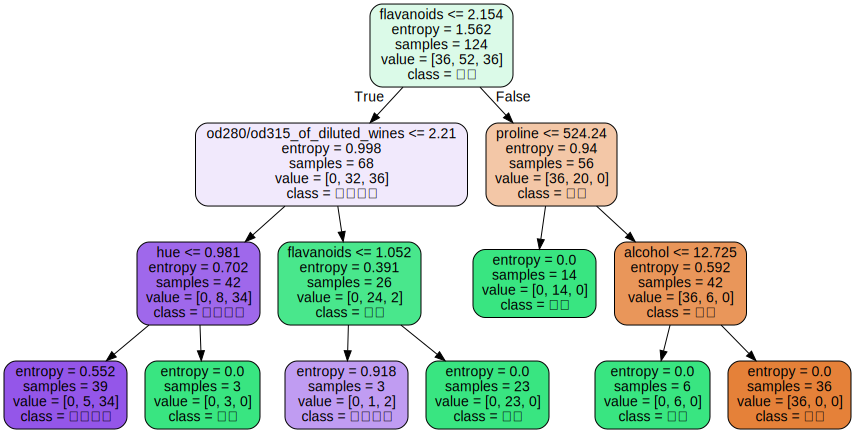

In [15]:
dot_data = export_graphviz(clf
                           ,feature_names = feature_names
                          ,class_names = ["琴酒", "雪莉", "贝尔摩德"] # target_names
                          ,filled = True
                          ,rounded = True
                          )
graph = graphviz.Source(dot_data)
graph

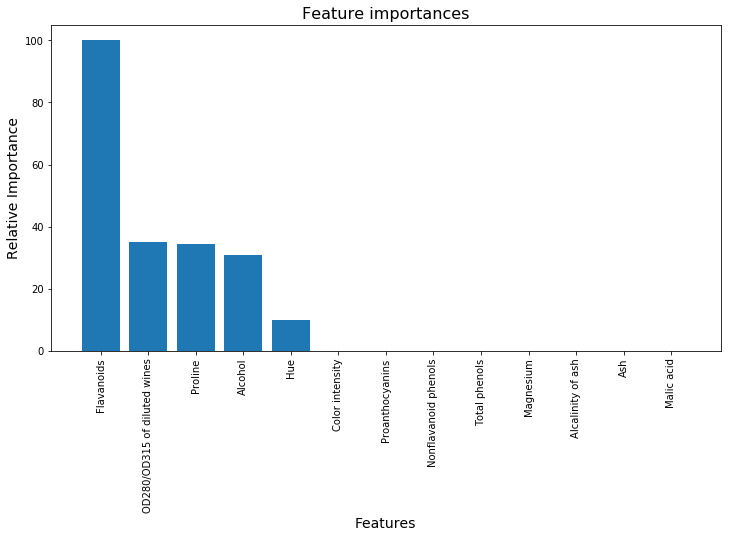

In [16]:
feature_importance = clf.feature_importances_  
plot_feature_importances(feature_importance, 'Feature importances', wine_df.columns)

# 2. Bagging (= Bootstrap Aggregating)

## 2.1 Create and train the Bagging model (base model: previous decision tree)

In [0]:
# create the base classifier for the bagging, the decision tree determined above
clf = DecisionTreeClassifier(criterion = "entropy"
                            ,splitter = "random"
                            ,random_state = 30
                            ,max_depth = 3
                            )

bag = BaggingClassifier(base_estimator = clf, n_estimators = 500,
                       max_samples = 1.0,
                       max_features = 1.0,
                       bootstrap_features = False,
                       n_jobs = 1,
                       random_state = 1)

In [18]:

# train the bagging model
bag = bag.fit(x_train, y_train)

train_score = bag.score(x_train, y_train)
test_score = bag.score(x_test, y_test)

print('Baggine train/test accuracies: {:.3f}/{:.3f}'.format(train_score, test_score))

Baggine train/test accuracies: 1.000/0.981


It is reasonable that the performance of the bagging is the best performance from the decision tree, since the decision tree model is implied in the bagging.

# Part Two: Random Forest

## 1. Create and train the RandomForest model

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)  # choose 30% of the data as validation dataset

In [20]:
rfc = RandomForestClassifier(random_state = 30)
rfc.fit(x_train, y_train)
train_score = rfc.score(x_train, y_train)
test_score = rfc.score(x_test, y_test)

print('Random Forest train/test accuracies: {:.3f}/{:.3f}'.format(train_score, test_score))

Random Forest train/test accuracies: 1.000/0.944


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 2. Random model fine tune (parameters adjusting)

The main parameters are similar to Decision Tree, 

another important parameter for Random Forest is n_estimators: the number of decision trees. 

### Importance of the parameters:
>Parameters | Explanation | importance
>--- | --- | ---
>**n_estimators** | increase n_estimators, doesn't impact DT complexity | ****
>**max_depth** | to avoid overfitting | ***
>**min_samples_leaf** & **min_samples_split** | numerical missing value as one class | **
>**max_features** | the only parameter could either increase or decrease the model complexity, auto = sqrt (default), decrease max_features, --> simple model, increase max_features, --> complex model | *  
>**Criterion** | entropy (more sensitive to impurity), gini(default) | depend on data

### 2.1 Parameter: n_estimators learning curve

Best performance: 0.9888888888888889
The value of n_estimators with the best performance: 14


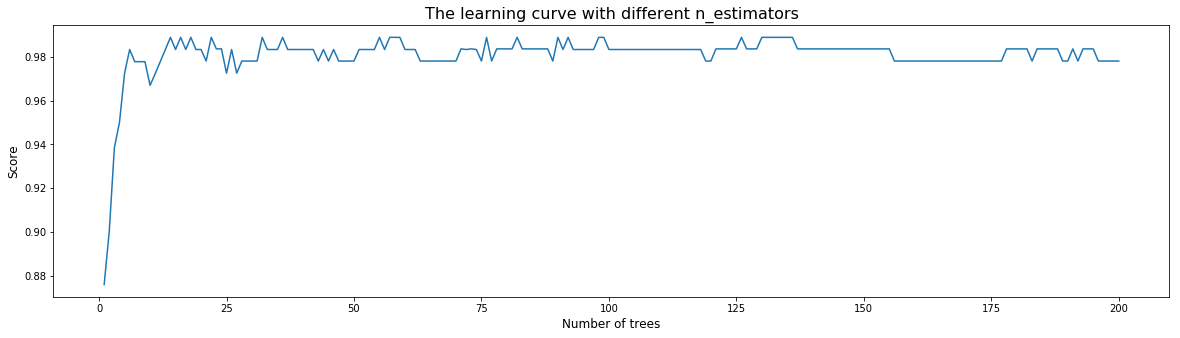

In [21]:
# time warning!!! about 10 minutes
scores = []
for i in range(200):
  rfc = RandomForestClassifier(n_estimators = i + 1, n_jobs = -1, random_state = 30)
  rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
  scores.append(rfc_s)
  
print("Best performance: {}".format(max(scores)))
print("The value of n_estimators with the best performance: {}".format(scores.index(max(scores)) + 1))
plt.figure(figsize = (20, 5))
plt.plot(range(1, 201), scores)
plt.title("The learning curve with different n_estimators", size = 16)
plt.ylabel("Score", size = 12)
plt.xlabel("Number of trees", size = 12)
plt.show()

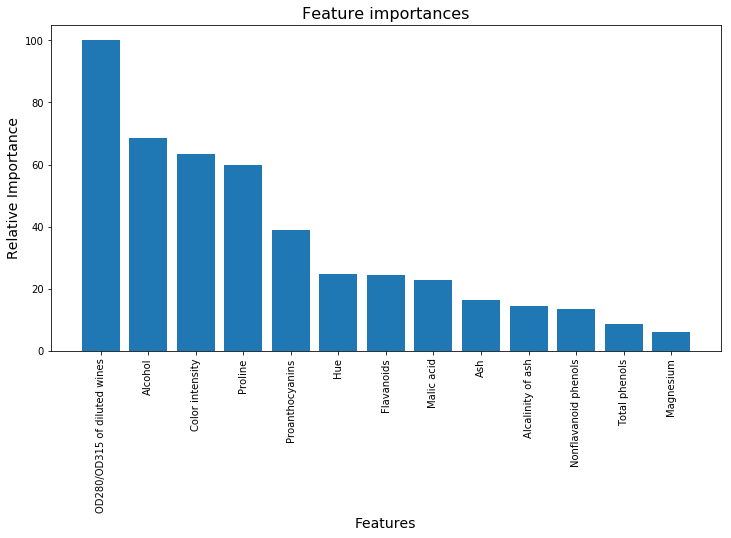

In [22]:
rfc = RandomForestClassifier(n_estimators = 14, n_jobs = -1, random_state = 30)
rfc.fit(x_train, y_train)
feature_importance = rfc.feature_importances_  
plot_feature_importances(feature_importance, 'Feature importances', wine_df.columns)

## 3. Out of bag error ???? not done


# Part Three: Boosting (Adaptive Boosting)

## 1. Create and train the Boosting model (base model: previous decision tree)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  # choose 30% of the data as validation dataset

In [24]:
# create the base classifier for the bagging, the decision tree determined above
clf = DecisionTreeClassifier(criterion = "entropy"
                            ,splitter = "random"
                            ,random_state = 30
                            ,max_depth = 3
                            )

ada = AdaBoostClassifier(base_estimator = clf, n_estimators = 500,
                       learning_rate = 0.1, random_state = 30)


ada.fit(x_train, y_train)
train_score = ada.score(x_train, y_train)
test_score = ada.score(x_test, y_test)

print('Boosting train/test accuracies: {:.3f}/{:.3f}'.format(train_score, test_score))

Boosting train/test accuracies: 1.000/1.000


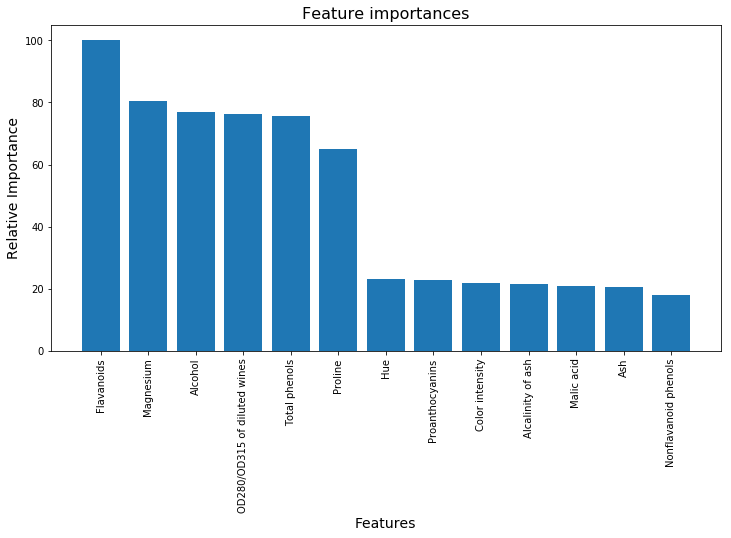

In [25]:
feature_importance = ada.feature_importances_  
plot_feature_importances(feature_importance, 'Feature importances', wine_df.columns)

# Part Four: Comparson of Decision Tree & Random Forest

## 1. The 10 times cross validation performance of DT, Bagging, Random Forest, and Boosting 

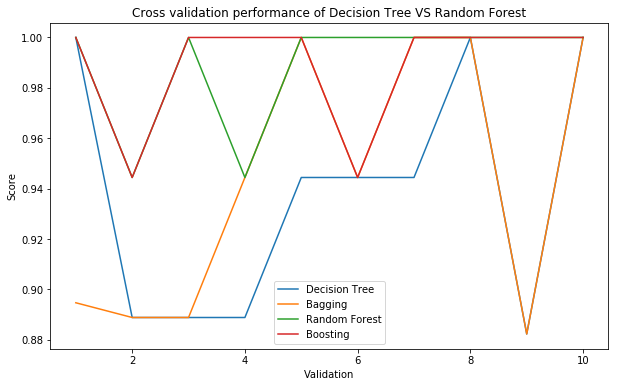

In [26]:
# cross validation of Decision Tree
clf = DecisionTreeClassifier(criterion = "entropy" ,splitter = "random" ,random_state = 30 ,max_depth = 3) # best parameters determined from part one
clf_s = cross_val_score(clf, wine.data, wine.target, cv = 10)

# cross validation of Bagging
bag = BaggingClassifier(base_estimator = clf, n_estimators = 14, random_state = 30)  # best best parameters determined from part two
bag_s = cross_val_score(bag, wine.data, wine.target, cv = 10)

# cross validation of Random Forest
rfc = RandomForestClassifier(n_estimators = 14, random_state = 30)  # best best parameters determined from part two
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10)


# cross validation of Boosting
ada = AdaBoostClassifier(base_estimator = clf, n_estimators = 500,
                       learning_rate = 0.1, random_state = 30)
ada_s = cross_val_score(ada, wine.data, wine.target, cv = 10)



#print("Decision Tree: {}".format(max(clf_means)))
#print("Random Forest: {}".format(max(rfc_means)))

plt.figure(figsize = (10, 6))
plt.title("Cross validation performance of Decision Tree VS Random Forest")
plt.ylabel("Score")
plt.xlabel("Validation")
plt.plot(range(1, 11), clf_s, label = "Decision Tree")
plt.plot(range(1, 11), bag_s, label = "Bagging")
plt.plot(range(1, 11), rfc_s, label = "Random Forest")
plt.plot(range(1, 11), ada_s, label = "Boosting")
plt.legend()
plt.show()

## 2. The mean of 10 times cross validation performance of DT & RF for 15 times

Decision Tree: 0.9382352941176467
Bagging: 0.9443756449948403
Random Forest: 0.9888888888888889
Boosting: 0.9888888888888889


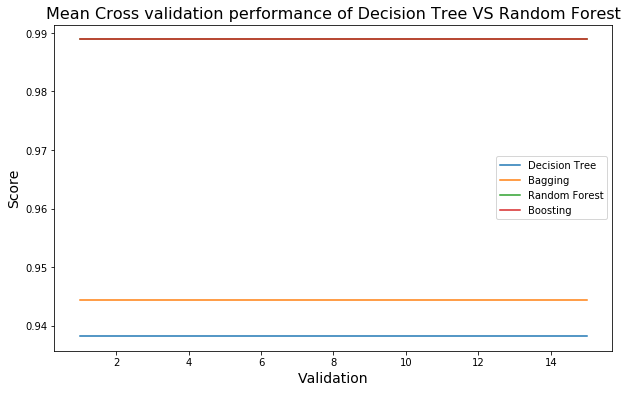

In [27]:
clf_means = []
bag_means = []
rfc_means = []
ada_means = []

for i in range(15):
  # cross validation of Decision Tree
  clf = DecisionTreeClassifier(criterion = "entropy" ,splitter = "random" ,random_state = 30 ,max_depth = 3) # best parameters determined from part one
  clf_s = cross_val_score(clf, wine.data, wine.target, cv = 10).mean()
  clf_means.append(clf_s)
  
  # cross validation of Bagging
  bag = BaggingClassifier(base_estimator = clf, n_estimators = 14, random_state = 30)  # best best parameters determined from part two
  bag_s = cross_val_score(bag, wine.data, wine.target, cv = 10).mean()
  bag_means.append(bag_s)

  # cross validation of Random Forest
  rfc = RandomForestClassifier(n_estimators = 14, random_state = 30)  # best best parameters determined from part two
  rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
  rfc_means.append(rfc_s)

  # cross validation of Boosting
  ada = AdaBoostClassifier(base_estimator = clf, n_estimators = 500,
                         learning_rate = 0.1, random_state = 30)
  ada_s = cross_val_score(ada, wine.data, wine.target, cv = 10).mean()
  ada_means.append(ada_s)

  
  
print("Decision Tree: {}".format(np.mean(clf_means)))
print("Bagging: {}".format(np.mean(bag_means)))
print("Random Forest: {}".format(np.mean(rfc_means)))
print("Boosting: {}".format(np.mean(ada_means)))

plt.figure(figsize = (10, 6))
plt.title("Mean Cross validation performance of Decision Tree VS Random Forest", size = 16)
plt.ylabel("Score", size = 14)
plt.xlabel("Validation", size = 14)
plt.plot(range(1, 16), clf_means, label = "Decision Tree")
plt.plot(range(1, 16), bag_means, label = "Bagging")
plt.plot(range(1, 16), rfc_means, label = "Random Forest")
plt.plot(range(1, 16), ada_means, label = "Boosting")

plt.legend()
plt.show()

## Conclusion

The performance of the decision tree is lowest(93.8%), while the performance of the boosting and random forest are the best(98.88%). 

It is reasonable that the boosting classifier learns from the previous model, and put more withghts on the incorrectly predicted samples.

## Discussion about the parameters
Usually the decision tree model or random forest model are easy to be overfitting. 
The parameters adjusting is usually to decrease the model complexity, to aovid overfitting. 

**The parameters decrease model complexity to avoid overfitting:**

- increase min_samples_leaf (the default value is the smallest)
- increase min_samples_split (the default value is the smallest)
- decrease max_depth (the default value is the largest)

**The only parameter could either increaes or decrease the model complexity:**

- max_features (sqrt by default, could increase or decrease)


**Other parameters:**
- criterion: gini, entropy
- n_estimators: doesn't change each decision, but very import to RF model.

In general, the parameters of DT and RF are similar. 
